# Ulaanbaatar PM2.5 Prediction

The purpose of this notebook is to create a predictive model of PM2.5 levels in Ulaanbaatar, Mongolia. 


# To Do 
1. Make a column that is number of days since start.
2. Predict specific value or should we predict category?
3. Convert hours and wind direction to something more understandable by the machine learning algorithm.
4. Separate into training and test data
5. Evaluate which model will best fit data.
6. Redo visualizations to be cleaner and give explanations

# Importing data and assumptions

The data exists in a CSV file that has the AQI data from the US Embassy in Ulaanbaatar and weather data from the Buyant Uhaa weather station. 

A few key facts about the AQI data:
- AQI contains only PM2.5 data
- AQI above 500 may not always be captured as the US AQI scale officially only goes to 500.

A few key facts about the weather data:
- The weather station is located approximately 30 kilometers away from the air quality station
- The location of the weather station is in the westernmost part of the valley Ulaanbaatar sits in

In [1]:
# Import relevant items
import pandas as pd
import numpy as np


In [2]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('weather-and-aqi-v4.csv')

The head of the dataframe shows lots of columns and LOTS of NaN's.

In [3]:
print(df.head())
print(df.columns)

                          Source.Name         Site       Parameter  \
0  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2017 12:00   
1  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2017 12:00   
2  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2017 12:00   
3  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2017 12:00   
4  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2017 12:00   

     Date (LST)  Year  Month  Day  Hour  Value   Unit ...      SLP   ALT  \
0  10/1/15 0:00  2015     10    1     0  0.176  mg/m3 ...   1022.0  30.0   
1  10/1/15 1:00  2015     10    1     1  0.071  mg/m3 ...      NaN  30.0   
2  10/1/15 2:00  2015     10    1     2  0.077  mg/m3 ...      NaN  30.0   
3  10/1/15 3:00  2015     10    1     3  0.058  mg/m3 ...   1017.0   NaN   
4  10/1/15 4:00  2015     10    1     4  0.056  mg/m3 ...      NaN  30.0   

     STP  MAX   MIN  PCP01  PCP06  PCP24  PCPXX   SD  
0    NaN  NaN  30.0    NaN    NaN    NaN    NaN  NaN  
1    NaN  Na

In [4]:
df.dtypes

Source.Name     object
Site            object
Parameter       object
Date (LST)      object
Year             int64
Month            int64
Day              int64
Hour             int64
Value          float64
Unit            object
AQI            float64
Duration        object
Date Key       float64
USAF             int64
WBAN             int64
Date Key.1     float64
Year.1           int64
Month.1          int64
Day.1            int64
Hour.1           int64
DIR            float64
SPD            float64
GUS            float64
CLG            float64
SKC             object
L              float64
M              float64
H              float64
VSB            float64
MW             float64
MW_1           float64
MW_2           float64
MW_3           float64
AW             float64
AW_4           float64
AW_5           float64
AW_6           float64
W              float64
TEMP           float64
DEWP           float64
SLP            float64
ALT            float64
STP            float64
MAX        

There are a large number of columns that are unneccesary. There are duplicate columns for Date, Year, Month, Day, and Hour. There are also columns for location name, station id, units, and intervals of measurement that are not useful in analysis. For now we can leave these columns in. 

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

# Visualizing Features<a name="visualize"></a>

**Let's plot the various features (pollution level, time, month, wind speed, etc) to find any relationships.**

When plotting the PM2.5 concentration by month you can clearly see that winter months have a much larger variation in pollution levels, including some very high levels.

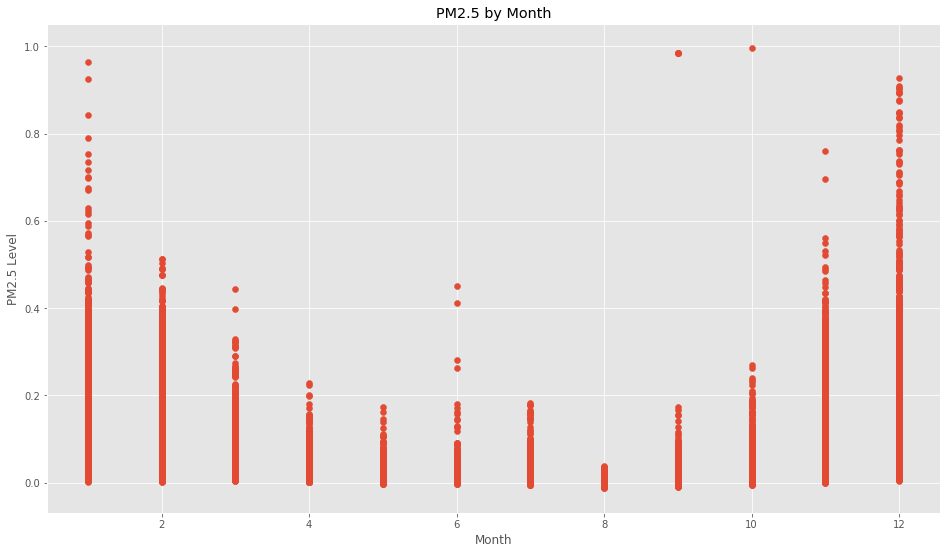

In [6]:
x = df['Month']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

Looking at the value plot by hour you can see there are two spikes each day, one between 9-11AM and the other starting around 20 and continuing through the night until 4.

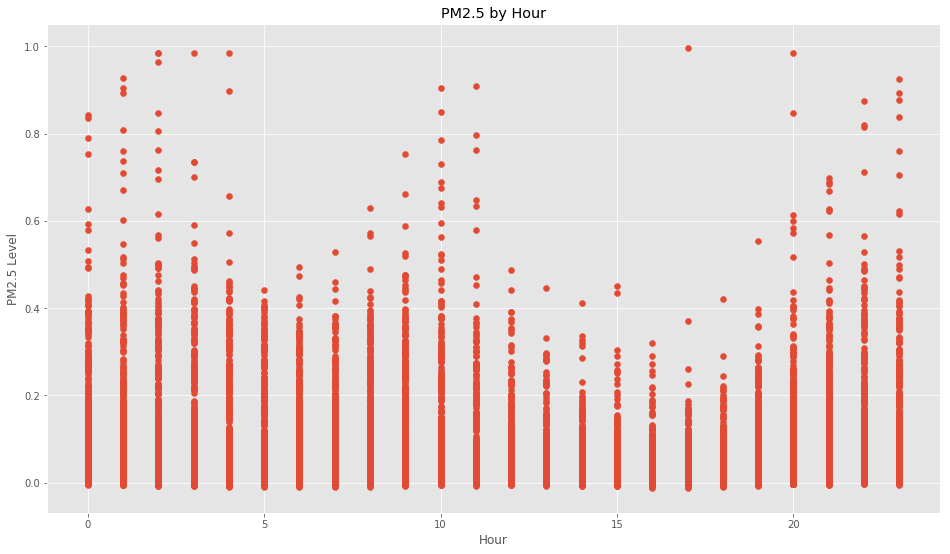

In [7]:
x = df['Hour']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

At higher windspeeds you notice a big drop in the recorded PM2.5 levels. It seems wind speed may be a good feature to predict PM2.5.

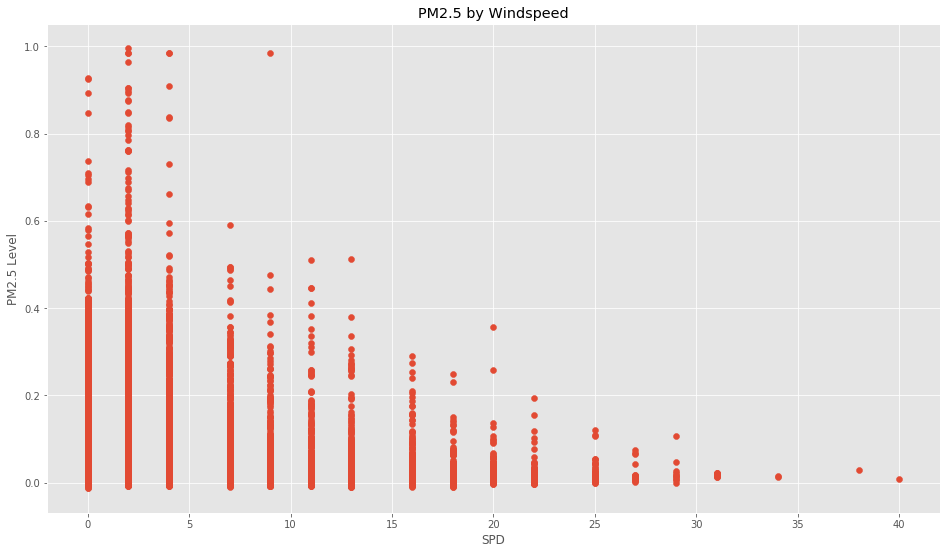

In [8]:
x = df['SPD']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

Make facet or subplot of PM2.5 levels by windspeed with one subplot per month. This will show if these lower measured values at low windspeeds are evenly distrbuted throughout the year or if they are mostly in certain months.

In [9]:
# Create a dataframe for each month. Less thinking than slicing it for each visualization. Could do this with a function also
month1 = df[df.Month == 1]
month2 = df[df.Month == 2]
month3 = df[df.Month == 3]
month4 = df[df.Month == 4]
month5 = df[df.Month == 5]
month6 = df[df.Month == 6]
month7 = df[df.Month == 7]
month8 = df[df.Month == 8]
month9 = df[df.Month == 9]
month10 = df[df.Month == 10]
month11 = df[df.Month == 11]
month12 = df[df.Month == 12]

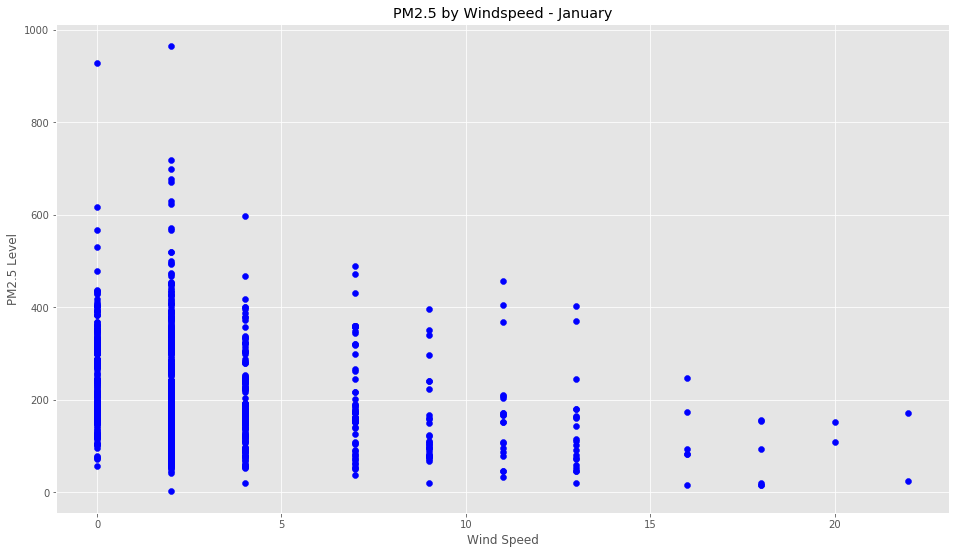

In [10]:
x = month1['SPD']
y = month1['AQI']
plt.scatter(x,y, color='blue')
plt.xlabel('Wind Speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed - January')
plt.show()

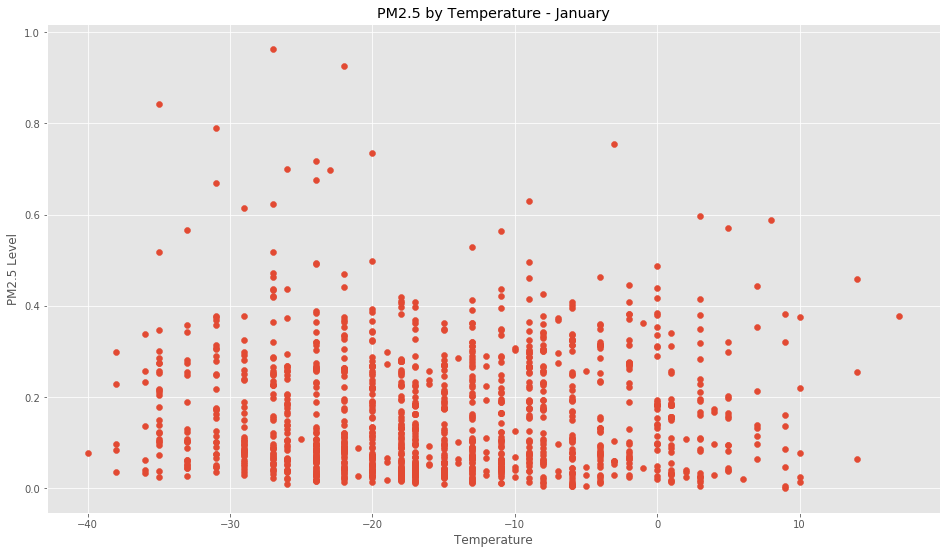

In [11]:
x = month1['TEMP']
y = month1['Value']
plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature - January')
plt.show()

In [12]:
x = month1['TEMP']
y = month1['SPD']
col = np.where(month1['AQI']<100,'None',np.where(month1['AQI']>100,'red','None'))
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.title('PM2.5 > 100 by Temperature and Windspeed - January')

Text(0.5,1,'PM2.5 > 100 by Temperature and Windspeed - January')

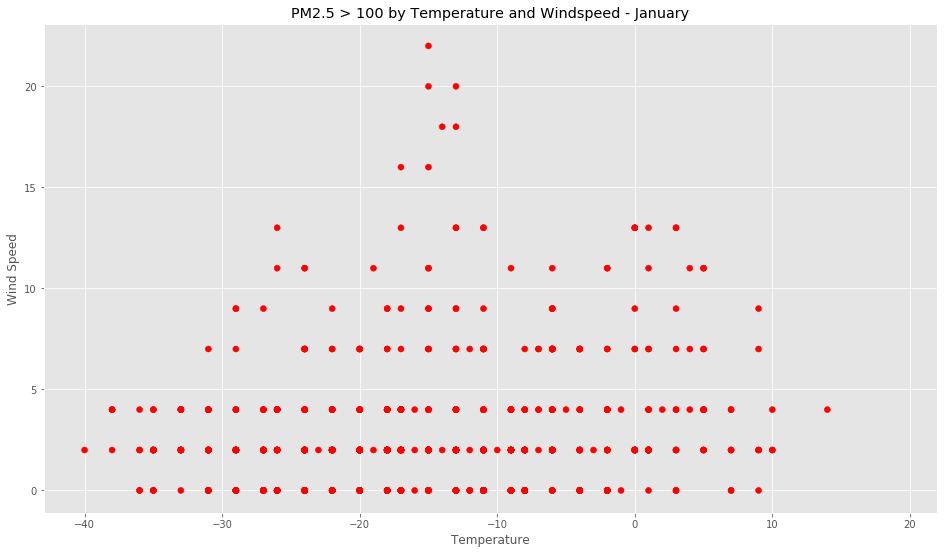

In [13]:
plt.show()

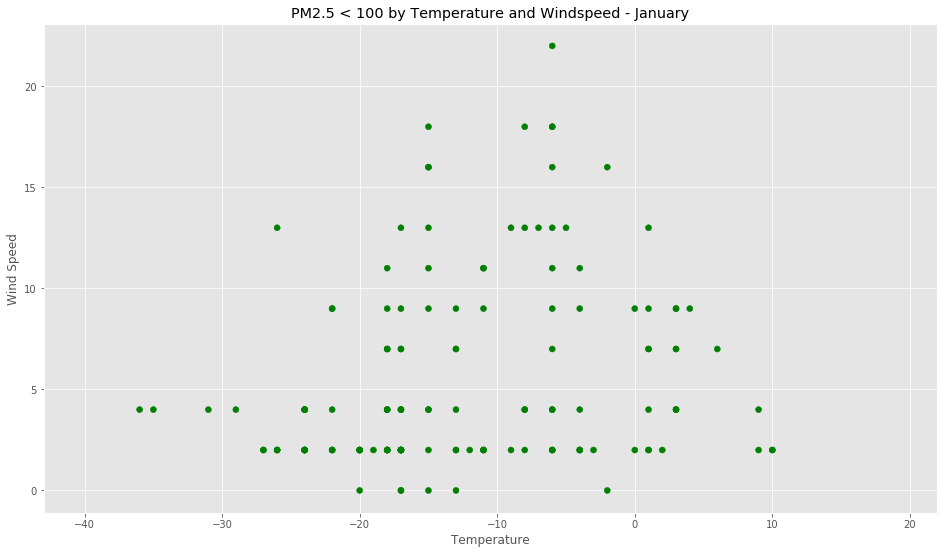

In [14]:
x = month1['TEMP']
y = month1['SPD']
col = np.where(month1['AQI']<100,'green',np.where(month1['AQI']>100,'None','None'))
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.title('PM2.5 < 100 by Temperature and Windspeed - January')
plt.show()

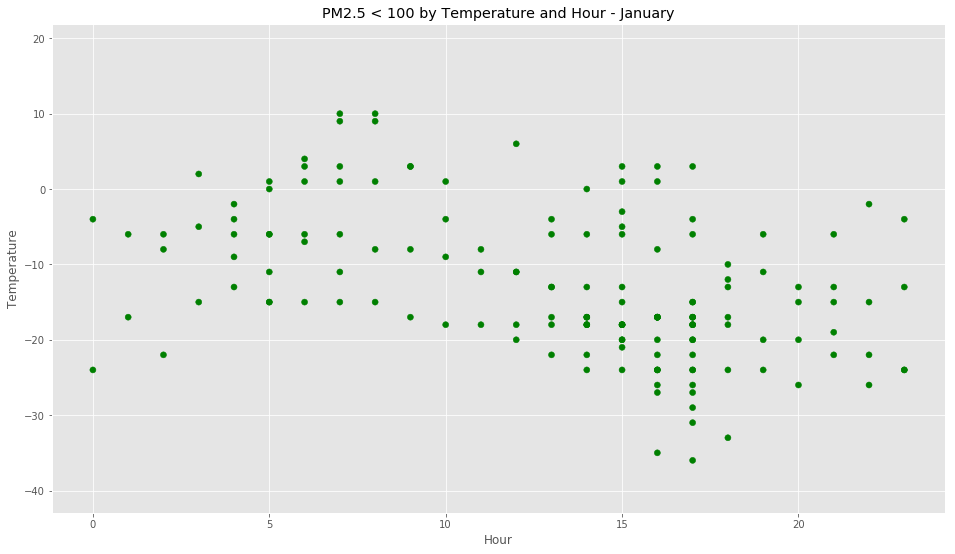

In [15]:
x = month1['Hour']
y = month1['TEMP']
col = np.where(month1['AQI']<100,'green',np.where(month1['AQI']>100,'None','None'))
plt.scatter(x,y, c=col)
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('PM2.5 < 100 by Temperature and Hour - January')
plt.show()

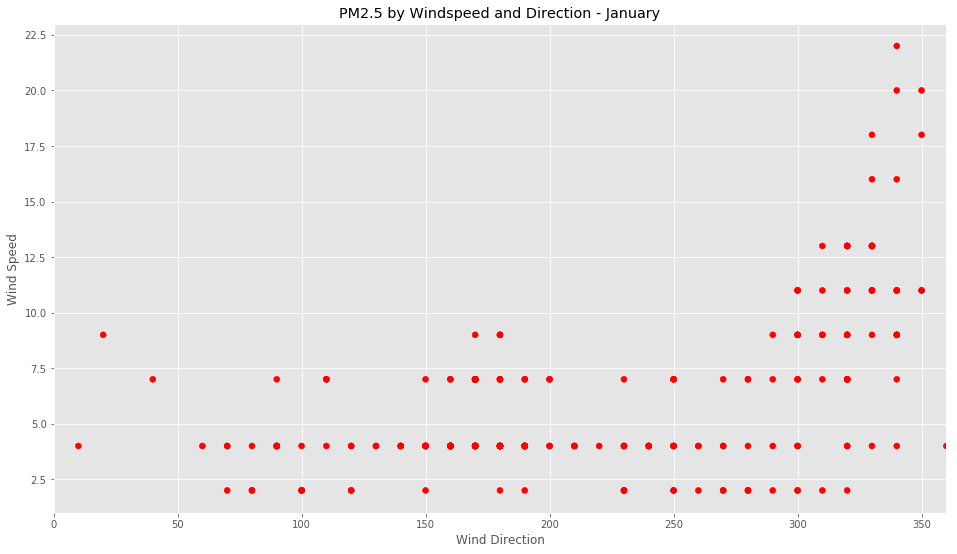

In [16]:
x = month1['DIR']
y = month1['SPD']
col = np.where(month1['AQI']<100,'None',np.where(month1['AQI']>100,'red','None'))
plt.scatter(x,y, c=col)
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')
plt.title('PM2.5 by Windspeed and Direction - January')
plt.xlim(0, 360)
plt.show()

## Determinations made from visualizations

- It is clear that at higher windspeed AQI is lower. Wind speed is possibly a good predictor.
- Winter months are a large predictor of AQI. Month is possibly a good predictor.
- While definite spikes are seen at certain times of day (from 5-11AM), values at all times of day have a high variance. Nevertheless it does seem somewhat predictive.
- Wind direction is given in a 360 degree arc, but variable wind directions are given as 990.
- Hours are given on a range from 0-24

== Next Steps ==
- Remove unneeded features (those that will be unavailable as inputs) - cleaning
- Find which features have NaNs, determine what to do with them - cleaning
- Change direction and hour of day to something machine learning models will understand better (more on this later) - feature engineering
- Determine how to handle dates - feature engineering

# Clean Data
## Drop unnecessary features

Thus far we have looked at the data available and relationships of some key features. Another key factor is determining what input data will be available to predict PM2.5. This model aims to predict PM2.5 levels into the future. This is possible due to weather forecasting providing inputs for the model. As such we will be limited to the data that is available from the weather forecast provider. Data that is available from several weather API forecasters:

- Temperature
- Humidity
- Wind speed
- Wind direction
- Dew point

To start, let's drop columns that clearly have no value as features.

In [17]:
df.columns

Index(['Source.Name', 'Site', 'Parameter', 'Date (LST)', 'Year', 'Month',
       'Day', 'Hour', 'Value', 'Unit', 'AQI', 'Duration', 'Date Key', 'USAF',
       'WBAN', 'Date Key.1', 'Year.1', 'Month.1', 'Day.1', 'Hour.1', 'DIR',
       'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB', 'MW', 'MW_1', 'MW_2',
       'MW_3', 'AW', 'AW_4', 'AW_5', 'AW_6', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT',
       'STP', 'MAX', 'MIN', 'PCP01', 'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')

Source.Name, Site, Parameter, Unit, Duration, USAF, and WBAN are the same for every row, and as such are not useful features. These are site identifiers for the weather station, the duration of measurement (which is constant), and the unit of PM2.5 measurement (which is in milligrams per cubic meter).

In [18]:
df = df.drop(['Source.Name', 'Site', 'Parameter', 'Unit', 'Duration', 'USAF', 'WBAN'], axis=1)

Date Key.1, Year.1, Month.1, Day.1, and Hour.1 are duplicates of the original date features. These were used to create the date key that was then used to combine the PM2.5 and weather data sets. Removing these will cause no harm.

In [19]:
df = df.drop(['Date Key.1', 'Year.1', 'Month.1', 'Day.1', 'Hour.1'], axis=1)

In [20]:
df.columns

Index(['Date (LST)', 'Year', 'Month', 'Day', 'Hour', 'Value', 'AQI',
       'Date Key', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB',
       'MW', 'MW_1', 'MW_2', 'MW_3', 'AW', 'AW_4', 'AW_5', 'AW_6', 'W', 'TEMP',
       'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01', 'PCP06', 'PCP24',
       'PCPXX', 'SD'],
      dtype='object')

The remaining fields are either 1) date fields, 2) PM2.5 values or their derived AQI values, and 3) weather data. As noted before we will only have a few features available for use in prediction. As such we will remove the rest. Below is an inventory of the available weather features. Those marked in bold will be removed

- **DIR - WIND DIRECTION IN COMPASS DEGREES, 990 = VARIABLE, REPORTED AS** "***" WHEN AIR IS CALM (SPD WILL THEN BE 000)
- **SPD** & GUS = **WIND SPEED** & GUST IN MILES PER HOUR 
- CLG = CLOUD CEILING--LOWEST OPAQUE LAYER
- SKC = SKY COVER
- L = LOW CLOUD TYPE, SEE BELOW
- M = MIDDLE CLOUD TYPE, SEE BELOW
- H = HIGH CLOUD TYPE, SEE BELOW 
- VSB = VISIBILITY IN STATUTE MILES TO NEAREST TENTH 
- MW MW1 MW2 MW3 = MANUALLY OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
- AW AW1 AW2 AW3 = AUTO-OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
- W = PAST WEATHER INDICATOR, SEE BELOW
- **TEMP & DEWP = TEMPERATURE & DEW POINT IN FAHRENHEIT**
- SLP = SEA LEVEL PRESSURE IN MILLIBARS TO NEAREST TENTH 
- ALT = ALTIMETER SETTING IN INCHES TO NEAREST HUNDREDTH
- STP = STATION PRESSURE IN MILLIBARS TO NEAREST TENTH
- MAX = MAXIMUM TEMPERATURE IN FAHRENHEIT (TIME PERIOD VARIES)
- MIN = MINIMUM TEMPERATURE IN FAHRENHEIT (TIME PERIOD VARIES)
- PCP01 = 1-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCP06 = 6-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCP24 = 24-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCPXX = LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- SD = SNOW DEPTH IN INCHES  

In [21]:
df = df.drop(['GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB', 'MW', 'MW_1', 'MW_2', 'MW_3', 'AW', 'AW_4', 'AW_5', 'AW_6', 'W', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01', 'PCP06', 'PCP24', 'PCPXX', 'SD'], axis=1)
df.columns

Index(['Date (LST)', 'Year', 'Month', 'Day', 'Hour', 'Value', 'AQI',
       'Date Key', 'DIR', 'SPD', 'TEMP', 'DEWP'],
      dtype='object')

## Value vs AQI

There are two columns showing PM2.5, Value and AQI.Take a look at the first 20 rows of the dataframe.

In [22]:
df.head(20)

,Date (LST),Year,Month,Day,Hour,Value,AQI,Date Key,DIR,SPD,TEMP,DEWP
0,10/1/15 0:00,2015,10,1,0,0.176,50.0,2.020000e+11,NaN,NaN,35.0,23.0
1,10/1/15 1:00,2015,10,1,1,0.071,60.0,2.020000e+11,NaN,0.0,36.0,27.0
2,10/1/15 2:00,2015,10,1,2,0.077,70.0,2.020000e+11,NaN,0.0,43.0,27.0
3,10/1/15 3:00,2015,10,1,3,0.058,80.0,2.020000e+11,210.0,4.0,47.0,29.0
4,10/1/15 4:00,2015,10,1,4,0.056,90.0,2.020000e+11,990.0,11.0,52.0,30.0
5,10/1/15 5:00,2015,10,1,5,0.036,100.0,2.020000e+11,270.0,16.0,55.0,30.0
6,10/1/15 6:00,2015,10,1,6,0.030,110.0,2.020000e+11,250.0,18.0,57.0,30.0
7,10/1/15 7:00,2015,10,1,7,0.044,120.0,2.020000e+11,990.0,22.0,57.0,28.0
8,10/1/15 8:00,2015,10,1,8,0.103,130.0,2.020000e+11,300.0,22.0,61.0,30.0
9,10/1/15 9:00,2015,10,1,9,0.176,140.0,2.020000e+11,270.0,16.0,59.0,28.0


It appears that there is a lag between when the Value goes up or down and the corresponding AQI is changed. This may be because the AQI is calculated in a moving window or at the end of the stated period. Let's visualize these two columns to better understand.

In [23]:
def value_aqi(date):
    fig, ax1 = plt.subplots()
    x = date.Hour
    s1 = date.Value
    ax1.plot(x, s1, 'b-')
    ax1.set_xlabel('hour')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Value', color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    s2 = date.AQI
    ax2.plot(x, s2, 'r.')
    ax2.set_ylabel('AQI', color='r')
    ax2.tick_params('y', colors='r')
    fig.tight_layout()
    return plt.show();

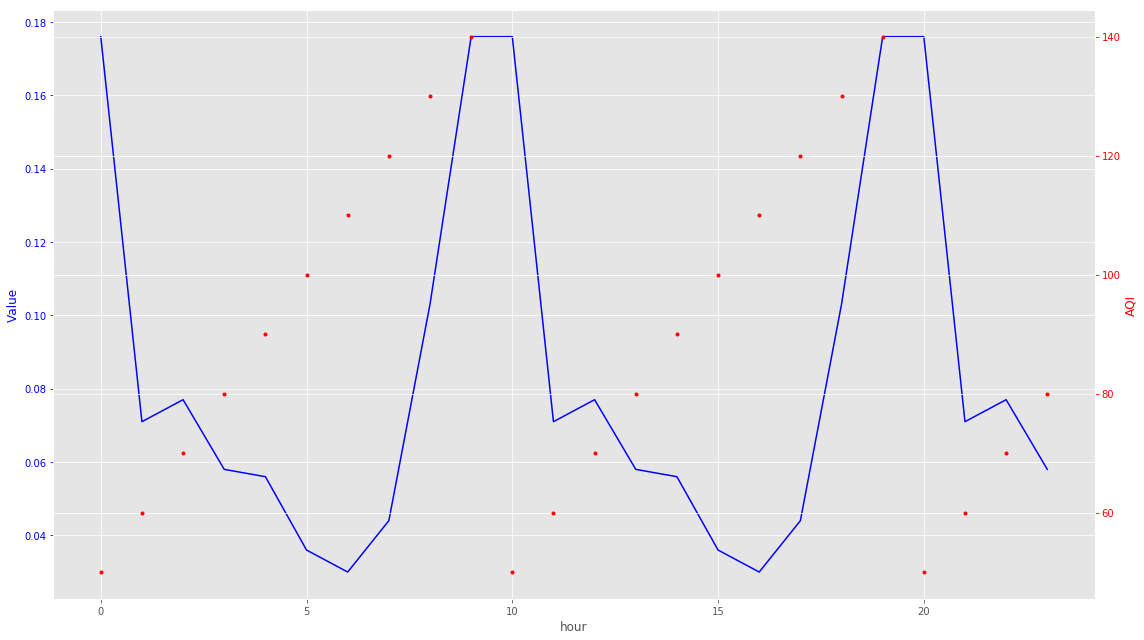

In [24]:
value_aqi(month10[:24])

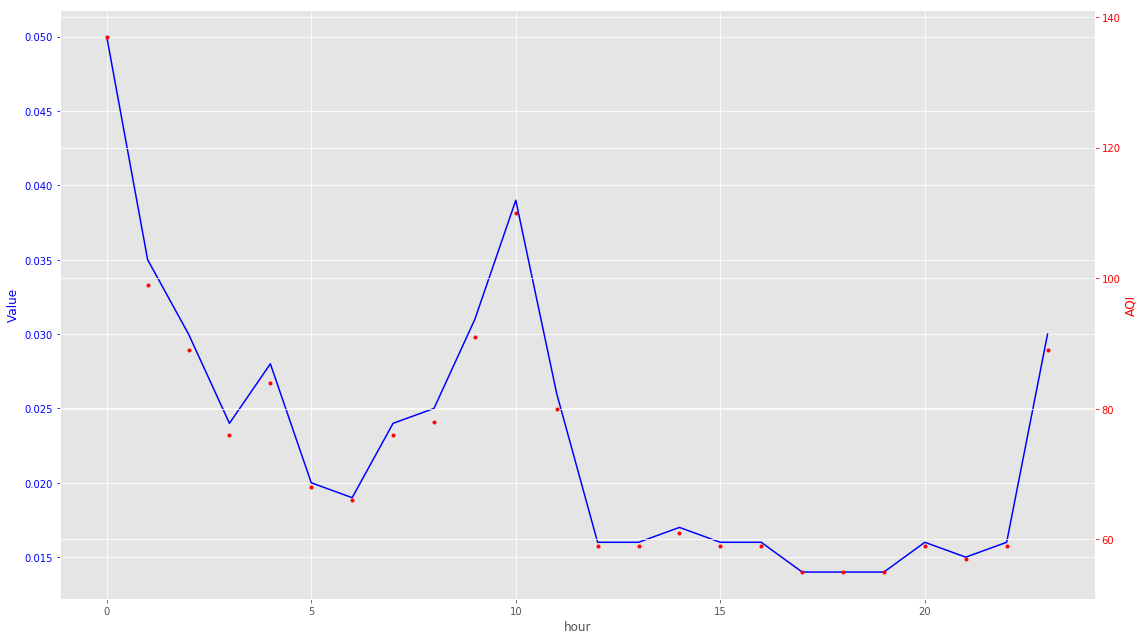

In [25]:
value_aqi(month6[:24])

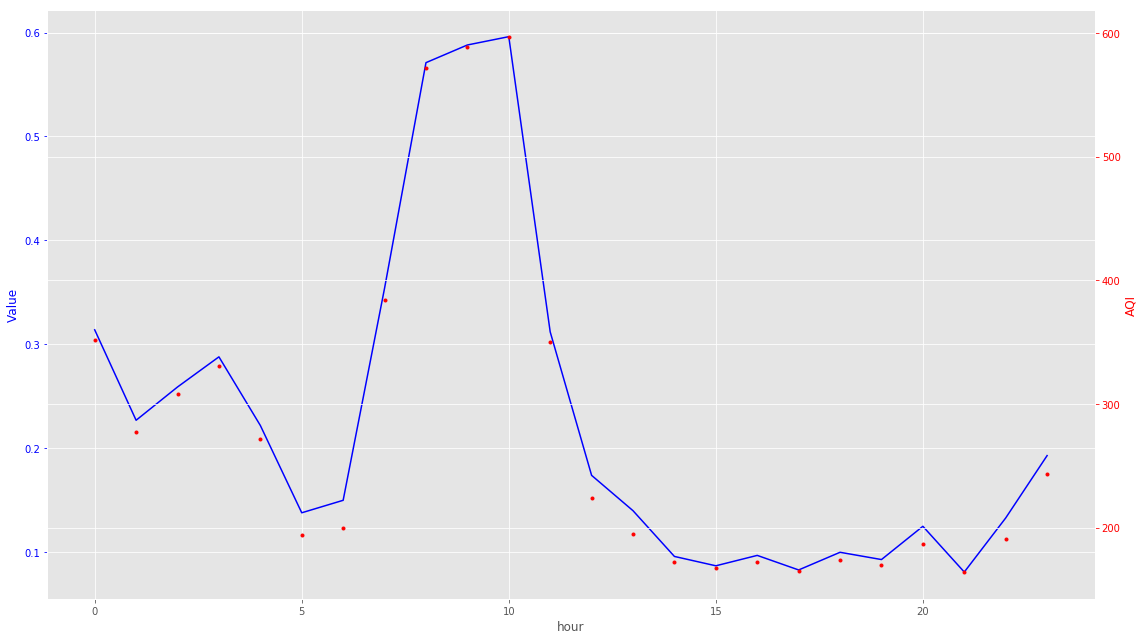

In [26]:
value_aqi(month1[:24])

**Possible reasons for AQI and Value not always being colinear**
- The AQI as calculated by the data source is a moving average that smoothed over time
- The first month of the dataset appears to be most impacted by this. It is possible the pollution station had some maintenance issues and the data is not reliable for some reason.

At some times AQI and Value track very closely as would be expected. However at others (in month 10 of 2015 for example) there is a disconnect. As we only need one feature, and the Value field is labeled with a specific unit, we will drop AQI in favor of PM2.5 Value.

In [27]:
df = df.drop(['AQI'], axis=1)
df.columns

Index(['Date (LST)', 'Year', 'Month', 'Day', 'Hour', 'Value', 'Date Key',
       'DIR', 'SPD', 'TEMP', 'DEWP'],
      dtype='object')

## Drop extra date/time columns

Earlier we determined that hour of day and month were both possibly useful predictors, and as such we will keep them in our data. However Year, Day, Date Key aren't needed. We will turn the Date (LST) feature into a datetime feature later.

In [28]:
df = df.drop(['Year', 'Day', 'Date Key'], axis=1)
df.columns

Index(['Date (LST)', 'Month', 'Hour', 'Value', 'DIR', 'SPD', 'TEMP', 'DEWP'], dtype='object')

## Create canonical date feature

As there are several date features, we can reduce these to one canonical one that is in a format that is easily parseable by Python or other programs. Also let's rename the 'Date (LST)' column to simply Date, as spaces in columns aren't ideal.

In [29]:
from datetime import datetime

df['Date (LST)'] = pd.to_datetime(df['Date (LST)'])
df = df.rename(columns={"Date (LST)": "Date"})

Incidentally now that we have a properly formatted Date field we can plot a time series of PM2.5 values over the entire dataset. Considering the length of time this may be messy, but let's give it a go.

In [30]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

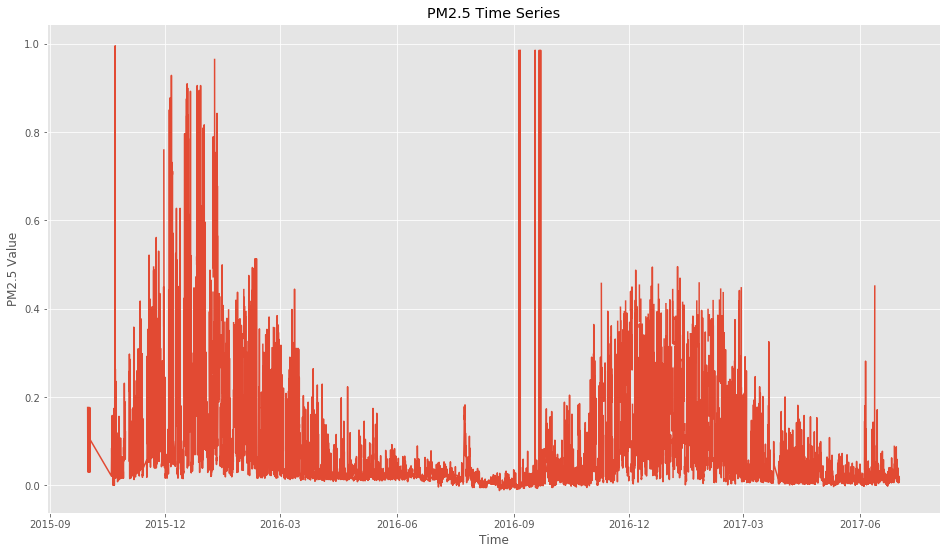

In [31]:
time_series('2015','2018')

The following graph shows a good example of outliers. These would appear to be errors in the data. In the graph above they appear in roughly the middle of the graph.

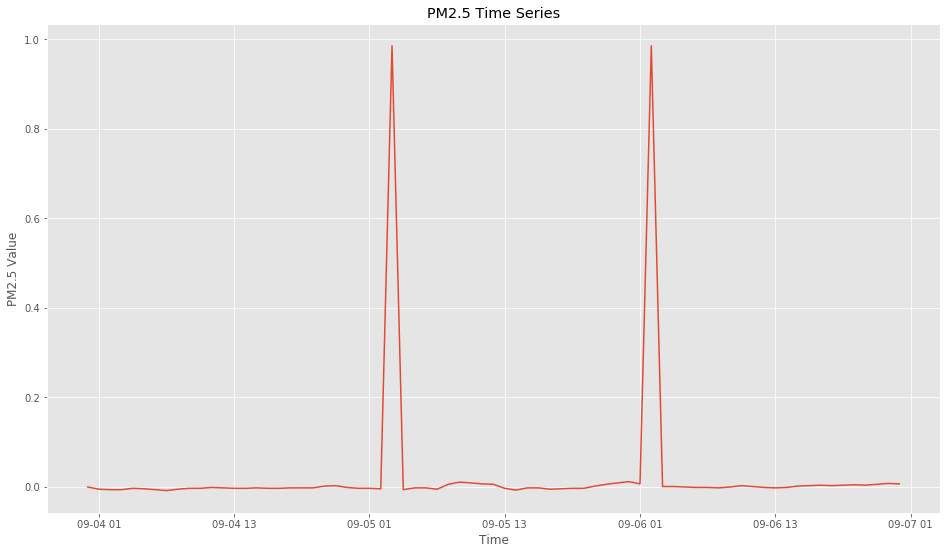

In [32]:
time_series('2016-09-04','2016-09-07')

It is quite clear that PM2.5 has a seasonal component. However it is also clear that there are outliers that are outside the normal trend. We can deal with these in the next section.

## Handling outliers
Let's handle those outlier points. First lets take a look at the date range from the graph above.

In [33]:
# Select the time frame from the graph above
df[['Date', 'Value']][(df['Date'] >= '2016-09-05 01') & (df['Date'] <= '2016-09-06 04')]

,Date,Value
7560,2016-09-05 01:00:00,-0.004
7561,2016-09-05 02:00:00,-0.005
7562,2016-09-05 03:00:00,0.985
7563,2016-09-05 04:00:00,-0.007
7564,2016-09-05 05:00:00,-0.003
7565,2016-09-05 06:00:00,-0.003
7566,2016-09-05 07:00:00,-0.006
7567,2016-09-05 08:00:00,0.005
7568,2016-09-05 09:00:00,0.010
7569,2016-09-05 10:00:00,0.008


It appears the two outlier values are both .985. Could this be a trend?

In [34]:
df[['Date', 'Value']][(df['Value'] == .985)]

,Date,Value
7562,2016-09-05 03:00:00,0.985
7585,2016-09-06 02:00:00,0.985
7867,2016-09-17 20:00:00,0.985
7945,2016-09-21 02:00:00,0.985
7971,2016-09-22 04:00:00,0.985


**Determinations**
- There are only 5 values that equal .985, so it does not appear to be an anomaly across the data set. 
- However they are all in month 9 of 2016. 
- Month 9 is a quite low pollution month, and an exploration of the data supports this. 

Considering these things it is prudent to remove these outliers.

In [35]:
# Check shape of dataframe to ensure that rows are dropped later
df.shape

(14745, 8)

In [36]:
df = df[df.Value != .985]
# Check shape again to confirm
df.shape

(14740, 8)

Next up is the early part of the data set. Between 2015-09 and around the middle of 2015-10 the data appears to be unreliable. The data in this period does not follow what would be expected of pollution levels. This is the time when the pollution monitoring station was installed, so it is logical to belive that the station could have some calibration or other maintenance during this initial phase.

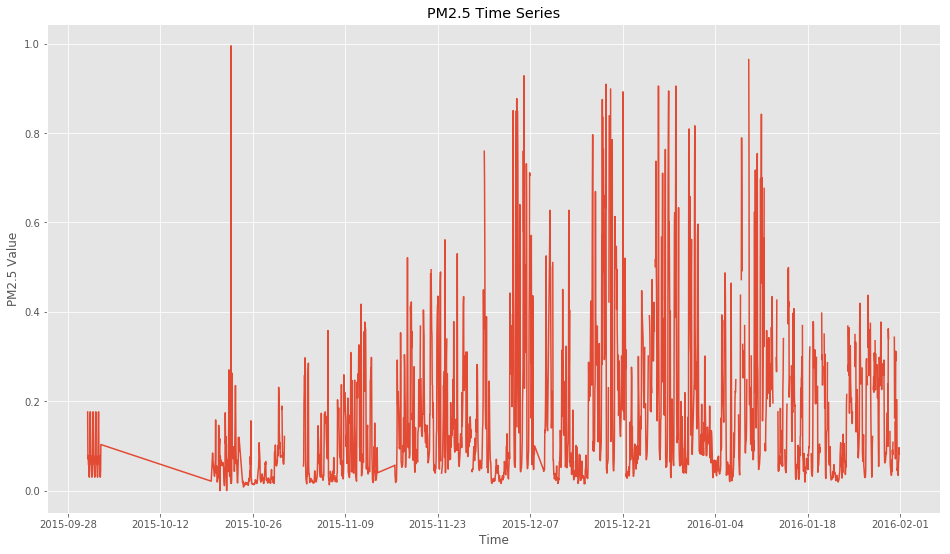

In [37]:
time_series('2015-10','2016-2')

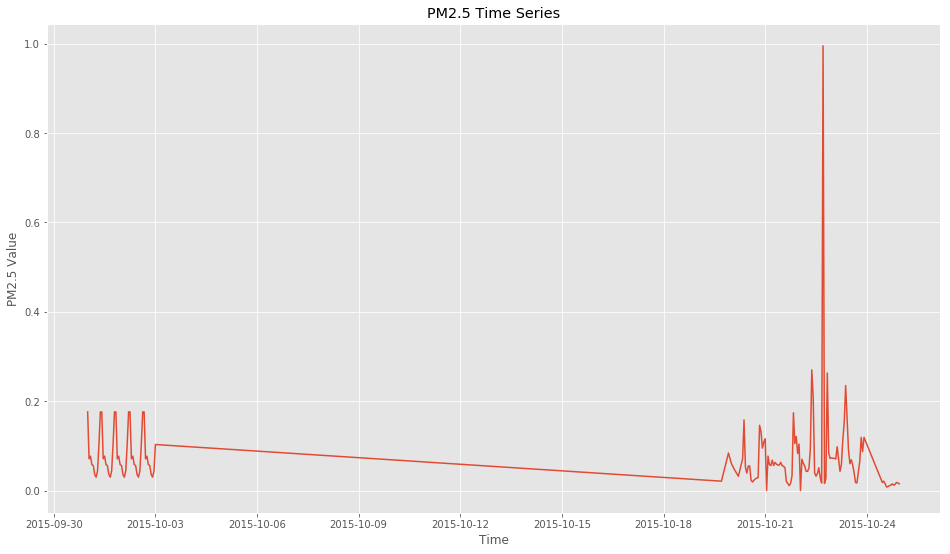

In [38]:
time_series('2015','2015-10-25')

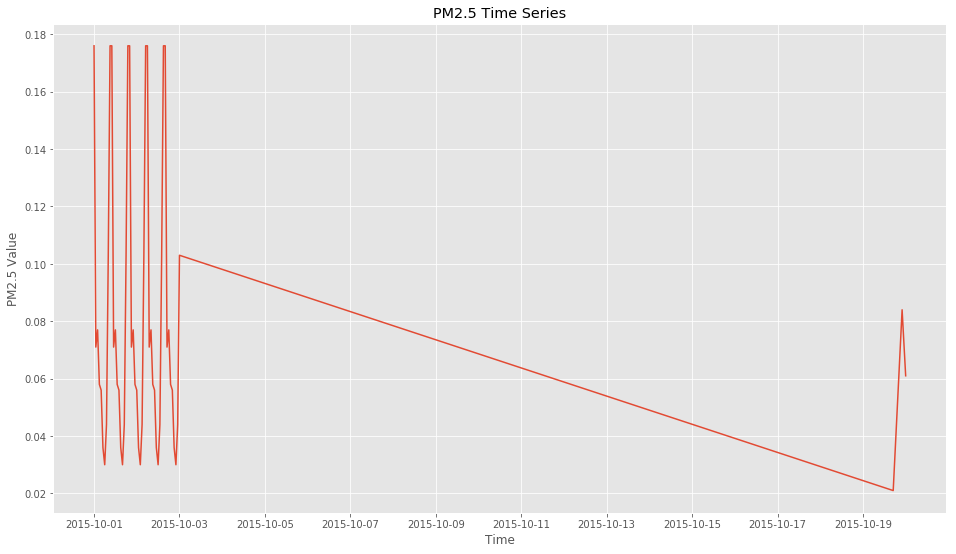

In [39]:
time_series('2015','2015-10-20')

In [40]:
# Select the time frame from the graph above
df[['Date', 'Value']][(df['Date'] >= '2015') & (df['Date'] <= '2015-10-20')]

,Date,Value
0,2015-10-01 00:00:00,0.176
1,2015-10-01 01:00:00,0.071
2,2015-10-01 02:00:00,0.077
3,2015-10-01 03:00:00,0.058
4,2015-10-01 04:00:00,0.056
5,2015-10-01 05:00:00,0.036
6,2015-10-01 06:00:00,0.030
7,2015-10-01 07:00:00,0.044
8,2015-10-01 08:00:00,0.103
9,2015-10-01 09:00:00,0.176


In [41]:
print("Shape before: ", df.shape)
df = df[df.Date > '2015-10-20 01']
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (14740, 8)
Shape after:  (14688, 8)


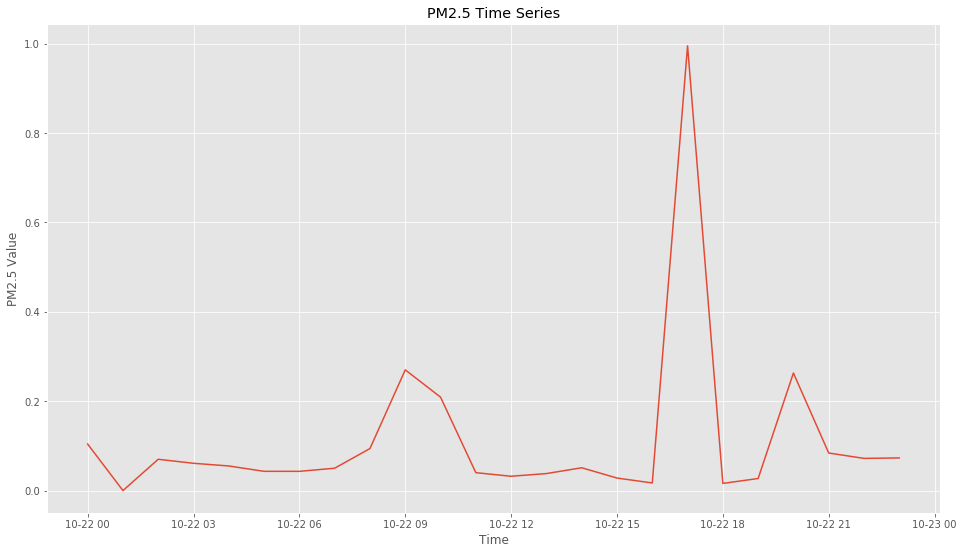

In [42]:
time_series('2015-10-22','2015-10-22 23')

In [43]:
# Select the time frame from the graph above
df[['Date', 'Value']][(df['Date'] >= '2015-10-22 16') & (df['Date'] <= '2015-10-22 18')]

,Date,Value
110,2015-10-22 16:00:00,0.017
111,2015-10-22 17:00:00,0.995
112,2015-10-22 18:00:00,0.016


In [44]:
df[['Date', 'Value']][(df['Value'] == .995)]

,Date,Value
111,2015-10-22 17:00:00,0.995


In [45]:
print("Shape before: ", df.shape)
df = df[df.Value != .995]
print("Shape after: ", df.shape)

Shape before:  (14688, 8)
Shape after:  (14687, 8)


After removing these outliers let's take a look at the full time series plot one more time.

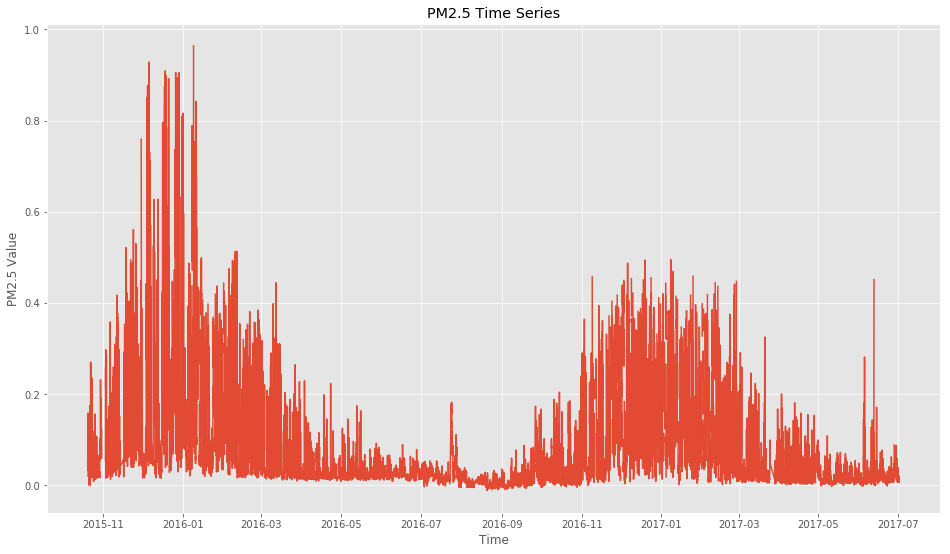

In [46]:
time_series('2015','2018')

## Handle NaNs

As stated at the beginning, there are quite a few NaN values in our dataset. Most of them have been taken out by dropping columns as the majority of some of the weather features had null values.

Process for handling NaNs
1. Determine where NaNs exist
2. Decide on a per feature (column) basis whether to drop NaN records (rows)
3. Decide on a per feature (column) basis if/how to interpolate data for NaN records. 
    - Interpolating can be either a mean of previous and next values, a constant number, or some other method. 

In [47]:
# Are there null values in our dataset?
df.isnull().values.any()

True

In [48]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
52,2015-10-20 02:00:00,10,2,0.048,NaN,0.0,30.0,16.0
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0
63,2015-10-20 17:00:00,10,17,0.026,NaN,0.0,18.0,16.0
64,2015-10-20 18:00:00,10,18,0.028,NaN,NaN,16.0,14.0
66,2015-10-20 20:00:00,10,20,0.146,NaN,0.0,16.0,14.0
67,2015-10-20 21:00:00,10,21,0.133,NaN,NaN,14.0,12.0
69,2015-10-20 23:00:00,10,23,0.108,NaN,0.0,14.0,12.0
70,2015-10-21 00:00:00,10,0,0.116,NaN,NaN,16.0,14.0
82,2015-10-21 12:00:00,10,12,0.056,NaN,NaN,38.0,16.0


Each feature will be handled independently. Some thoughts on each (Date, Month, Hour, Value, DIR, SPD, TEMP, DEWP):

1. **Date, Month,** and **Hour** should have no NaNs, as this was how the two data sets (AQI and weather) were merged. However we should check to be sure.
2. Since we are predicting for the **Value** feature, any record with a NaN for Value should be removed.
3. Currently less is known about **DIR, SPD, TEMP, DEWP**. Let's explore more and see.

In [49]:
# 1. Check if Date, Month, or Hour have NaNs
print("Date contains nulls:", df.Date.isnull().values.any())
print("Month contains nulls:", df.Month.isnull().values.any())
print("Hour contains nulls:", df.Hour.isnull().values.any())

Date contains nulls: False
Month contains nulls: False
Hour contains nulls: False


In [50]:
df.shape

(14687, 8)

In [51]:
# 2. Drop any row where Value is NaN

# Show rows where value is NaN
df[df['Value'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
273,2015-10-30 07:00:00,10,7,NaN,260.0,4.0,34.0,14.0
274,2015-10-30 08:00:00,10,8,NaN,230.0,4.0,34.0,16.0
286,2015-10-30 20:00:00,10,20,NaN,990.0,2.0,10.0,7.0
287,2015-10-30 21:00:00,10,21,NaN,80.0,2.0,9.0,7.0
288,2015-10-30 22:00:00,10,22,NaN,990.0,2.0,9.0,5.0
289,2015-10-30 23:00:00,10,23,NaN,990.0,2.0,7.0,3.0
290,2015-10-31 00:00:00,10,0,NaN,80.0,4.0,9.0,5.0
291,2015-10-31 01:00:00,10,1,NaN,NaN,0.0,14.0,9.0
292,2015-10-31 02:00:00,10,2,NaN,990.0,2.0,19.0,12.0
293,2015-10-31 03:00:00,10,3,NaN,70.0,4.0,23.0,14.0


There are a total of 772 rows with NaNs in the Value column out of 14687. We can drop these.

In [52]:
df = df.dropna(axis=0,subset=['Value'])
df.shape

(13915, 8)

For the next 4 features let's explore these a bit to see if there is a pattern to the NaNs so that they can be intelligently replaced.

In [53]:
# Show rows where DIR is NaN
df[df['DIR'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
52,2015-10-20 02:00:00,10,2,0.048,NaN,0.0,30.0,16.0
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0
63,2015-10-20 17:00:00,10,17,0.026,NaN,0.0,18.0,16.0
64,2015-10-20 18:00:00,10,18,0.028,NaN,NaN,16.0,14.0
66,2015-10-20 20:00:00,10,20,0.146,NaN,0.0,16.0,14.0
67,2015-10-20 21:00:00,10,21,0.133,NaN,NaN,14.0,12.0
69,2015-10-20 23:00:00,10,23,0.108,NaN,0.0,14.0,12.0
70,2015-10-21 00:00:00,10,0,0.116,NaN,NaN,16.0,14.0
82,2015-10-21 12:00:00,10,12,0.056,NaN,NaN,38.0,16.0


In [54]:
# Show rows where SPD is NaN
df[df['SPD'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0
64,2015-10-20 18:00:00,10,18,0.028,NaN,NaN,16.0,14.0
67,2015-10-20 21:00:00,10,21,0.133,NaN,NaN,14.0,12.0
70,2015-10-21 00:00:00,10,0,0.116,NaN,NaN,16.0,14.0
82,2015-10-21 12:00:00,10,12,0.056,NaN,NaN,38.0,16.0
85,2015-10-21 15:00:00,10,15,0.020,NaN,NaN,21.0,14.0
88,2015-10-21 18:00:00,10,18,0.016,NaN,NaN,26.0,10.0
91,2015-10-21 21:00:00,10,21,0.105,NaN,NaN,16.0,12.0
94,2015-10-22 00:00:00,10,0,0.104,NaN,NaN,26.0,10.0


In [55]:
# Show rows where TEMP is NaN
df[df['TEMP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
1144,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN
1351,2015-12-18 11:00:00,12,11,0.909,160.0,4.0,NaN,-20.0
2306,2016-01-27 14:00:00,1,14,0.147,NaN,0.0,NaN,-35.0
2316,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN
4948,2016-05-18 04:00:00,5,4,0.011,240.0,25.0,NaN,NaN
4949,2016-05-18 05:00:00,5,5,0.010,240.0,27.0,NaN,NaN
5144,2016-05-26 08:00:00,5,8,0.041,280.0,20.0,NaN,NaN
9336,2016-11-19 23:00:00,11,23,0.331,170.0,4.0,NaN,NaN
10724,2017-01-11 04:00:00,1,4,0.190,NaN,0.0,NaN,NaN
10817,2017-01-15 01:00:00,1,1,0.015,990.0,2.0,NaN,-35.0


In [56]:
# Show rows where DEWP is NaN
df[df['DEWP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
783,2015-11-23 01:00:00,11,1,0.435,990.0,2.0,-26.0,NaN
1133,2015-12-09 00:00:00,12,0,0.047,NaN,NaN,0.0,NaN
1144,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN
1282,2015-12-15 14:00:00,12,14,0.030,990.0,2.0,-20.0,NaN
1627,2015-12-30 00:00:00,12,0,0.057,50.0,7.0,-15.0,NaN
1896,2016-01-10 11:00:00,1,11,0.266,990.0,2.0,-24.0,NaN
2316,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN
4948,2016-05-18 04:00:00,5,4,0.011,240.0,25.0,NaN,NaN
4949,2016-05-18 05:00:00,5,5,0.010,240.0,27.0,NaN,NaN
5144,2016-05-26 08:00:00,5,8,0.041,280.0,20.0,NaN,NaN


In [57]:
# Show rows where DEWP & TEMP is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
1144,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN
2316,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN
4948,2016-05-18 04:00:00,5,4,0.011,240.0,25.0,NaN,NaN
4949,2016-05-18 05:00:00,5,5,0.010,240.0,27.0,NaN,NaN
5144,2016-05-26 08:00:00,5,8,0.041,280.0,20.0,NaN,NaN
9336,2016-11-19 23:00:00,11,23,0.331,170.0,4.0,NaN,NaN
10724,2017-01-11 04:00:00,1,4,0.190,NaN,0.0,NaN,NaN
13322,2017-05-03 05:00:00,5,5,-0.002,280.0,22.0,NaN,NaN
13489,2017-05-10 04:00:00,5,4,0.023,260.0,25.0,NaN,NaN


In [58]:
# Show rows where DEWP & TEMP & DIR is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull() & df['DIR'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
10724,2017-01-11 04:00:00,1,4,0.19,NaN,0.0,NaN,NaN


Considering the very small number of rows in DEWP and TEMP that have NaNs we can safely drop them. We will only lose 24 records from the data.

In [59]:
df = df.dropna(axis=0,subset=['DEWP', 'TEMP'])
df.shape

(13891, 8)

The last two features to contend with are SPD and DIR. Both have a high number of NaNs. We have several options:

- A constant value (0 for example)
- A value from another record. For example the previous record or the next record that is not NaN
- A mean, median, mode
- A value determined from another model
- Drop the records with NaNs

Choosing the right method may require trial and error. However without testing each method iteratively let's think about the best approach. Consider taking the mean wind direction and imputing that value. 

The most straightforward approach would be to simply drop all NaN's. However it is possible that removing them could take away valuable signal for the machine learning model. So for now we can attempt option 2, imputing values from other records.

In [60]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP
count,13891.000000,13891.000000,13891.000000,11042.000000,12633.000000,13891.000000,13891.000000
mean,6.158376,11.587719,0.072889,597.638109,5.750416,27.670146,12.528472
std,3.537250,6.881073,0.104728,391.124705,5.354752,30.403039,23.511423
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-40.000000,-49.000000
25%,3.000000,6.000000,0.015000,230.000000,2.000000,1.000000,-6.000000
50%,6.000000,12.000000,0.029000,360.000000,4.000000,28.000000,13.000000
75%,10.000000,18.000000,0.083000,990.000000,9.000000,54.000000,30.000000
max,12.000000,23.000000,0.964000,990.000000,40.000000,99.000000,64.000000


# Feature Engineering

## Convert cyclical features



## Create previous hour value feature

## Create moving average feature